In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Integrais 2D

## Questão 1

Uma integral 2D pode ser vista de 2 formas:
- repetindo uma integral 1D ao longo de várias "fatias", conhecida como "integral iterada";
- uma integral numa região 2D, dividindo a mesma em "pequenos quadrados" e somando "pequenos paralelepípedos", conhecida como "integral dupla".

Implemente o método do retângulo para a integral iterada
$$ \int_a^b \left( \int_c^d f(x,y) \, dy \right) \, dx $$
onde $a \leq x \leq b$ e $c \leq y \leq d$.
Note que a integral "interna" pode ser vista como uma caixa-preta $g(x)$
que recebe $x$ e retorna $\int_c^d f(x,y) \, dy$.

Obs: é mais fácil não esperar que $g$ assim definida seja vetorizada.

In [2]:
def int2_rect(f, a, b, c, d, nx=200, ny=200):
    """Integral de f no domínio  [a,b] x [c,d],  usando  nx x ny  subretângulos de integração."""
    xis=np.linspace(a,b,num=nx,endpoint=False)
    yis=np.linspace(c,d,num=ny,endpoint=False)
    C = ((b-a)/nx)*((d-c)/ny)
    def g(x):
        return np.sum(f(x,yis))
    return np.sum(np.fromiter((g(xi)for xi in xis),float))*C

In [3]:
def p2(x,y):
    return x**2 * (y-1)**2

Ip2 = int2_rect(p2, 0, 2, 0, 1)

assert np.isclose(Ip2, 8/9, atol=3e-5)
assert np.isclose(Ip2, 0.88886111125, atol=1e-12, rtol=1e-12)

In [4]:
Ip2 = int2_rect(p2, 0, 2, 0, 1, nx=1000)
assert np.isclose(Ip2, 8/9, atol=1e-2)
assert np.isclose(Ip2, 0.89422376445, atol=1e-12, rtol=1e-12)

In [5]:
err = int2_rect(p2, 0, 2, 0, 1, nx=1000, ny=1000) - 8/9
assert 2e-7 <= np.abs(err) <= 2e-6

O que você percebe nestes testes?

Da para notar que primeiro foi-se testado se a o método implementado está minimamente correto logo depois se ele chega no resultado que ele deveria encontrar se o código estivesse escrito da forma desejada.

Na segunda célula se testa novamente o mesmo que o escrito acima mas agora variando nx para um valor bem maior. Pode se perceber esse valor altera a precisão do resultado esperado já que as tolerâncias dadas para os asserts muda consideravelmente.

E por último, é testado o erro do método com o valor correto da integral da função no intervalo para verificar se este erro está dentro do esperado para o número de subdivisões escolhido (para $nx=ny=10^{3}$ o erro deveria ser da ordem de $10^{-6}$ e se for passará no assert)

## Questão 2: erros em função do número de subintervalos

Faça um gráfico do erro ao variar `nx`, com `ny=1000`.
Até quantos pontos você acha razoável aumentar `nx`? (pense em quantos pontos você vai calcular $f(x_i,y_j)$)

Não esqueça do `dtype=int` se usar `np.linspace` ou `np.logspace` ;-)

In [6]:
%%time
# Cuidado ao usar muitos `nx`: a caixa inteira deve executar em menos de 30 segundos (donde o %%time acima)!
# Use esta caixa apenas para calcular os erros, e a seguinte para fazer os gráficos.
nxs1=np.linspace(100,2000,num=400,dtype=int)
y1 = [int2_rect(p2, 0, 2, 0, 1, nxs_i,1000)-8/9 for nxs_i in nxs1]

Wall time: 15.8 s


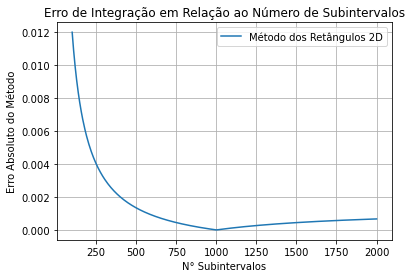

In [7]:
plt.plot(nxs1,np.abs(y1),label="Método dos Retângulos 2D")
plt.title("Erro de Integração em Relação ao Número de Subintervalos")
plt.xlabel("N° Subintervalos")
plt.ylabel("Erro Absoluto do Método")
plt.legend()
plt.grid();
ax = plt.gca()

In [8]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1 
assert ax.get_xlabel() != ""

Para atender o critério de 30s em cada célula o ideal é não fazer muitas operações próximas de $nx=10^{4}$ então foi escolhido valores de nx até $2x10^{3}$

Faça o mesmo gráfico do erro para a função abaixo, integrada no quadrado $[0,1] \times [0,1]$.
Você obtém o mesmo comportamento, ou outro?
Por que você acha que isso acontece?

In [9]:
def outraf(x,y):
    return np.sin(x-y)**2 + np.cos(2*y+x)

# Integral no quadrado [0,1]x[0,1]
ans = 1/2 - (3 * np.sin(1)**2)/2 + np.sin(1) * np.sin(2)

In [10]:
%%time

# Cuidado ao usar muitos `nx`: a caixa inteira deve executar em menos de 30 segundos (donde o %%time acima)!
# Use esta caixa apenas para calcular os erros, e a seguinte para fazer os gráficos.
nxs2=np.linspace(100,2000,num=300,dtype=int)
y2 = [int2_rect(outraf, 0, 1, 0, 1, nxs_i,1000)-ans for nxs_i in nxs2]

Wall time: 25.8 s


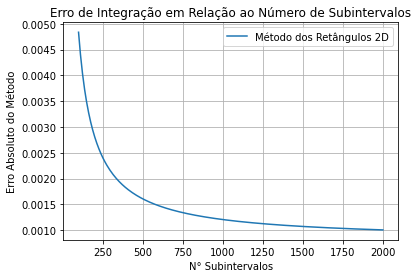

In [11]:
plt.plot(nxs2,np.abs(y2),label="Método dos Retângulos 2D")
plt.title("Erro de Integração em Relação ao Número de Subintervalos")
plt.xlabel("N° Subintervalos")
plt.ylabel("Erro Absoluto do Método")
plt.legend()
plt.grid();
ax = plt.gca()

In [12]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1 
assert ax.get_xlabel() != ""

Percebemos outro comportamento pois essa outra função diferentemente da $p_{2}(x,y)$ continua tendo erros menores a medida que se aumenta o valor de $nx$ depois do ponto $nx=ny$ coisa que a função $p_{2}(x,y)$ não faz, já que está tende a aumentar o erro para valores onde $nx>ny$.

## Questão 3: Alterando ambos passos

Agora, varie `nx` e `ny` conjuntamente, para ambas funções acima (`p2` e `outraf`).

In [13]:
%%time
ns3 = np.logspace(1,4,num=20,dtype=int,endpoint=True)
y3 = [int2_rect(p2, 0, 2, 0, 1, ns_i,ns_i)-8/9 for ns_i in ns3]
y4 = [int2_rect(outraf, 0, 1, 0, 1, ns_i,ns_i)-ans for ns_i in ns3]

Wall time: 7.77 s


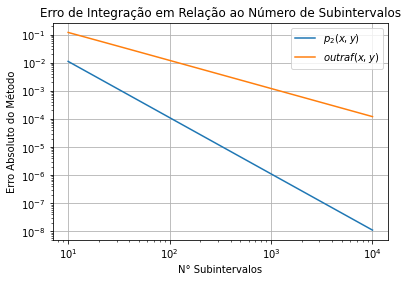

In [14]:
plt.loglog(ns3,np.abs(y3),label="$p_{2}(x,y)$")
plt.loglog(ns3,np.abs(y4),label="$outraf(x,y)$")
plt.title("Erro de Integração em Relação ao Número de Subintervalos")
plt.xlabel("N° Subintervalos")
plt.ylabel("Erro Absoluto do Método")
plt.legend()
plt.grid();
ax = plt.gca()

In [15]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert ax.get_xlabel() != ""

Compare as curvas entre si, e com o comportamento ao mudar apenas `nx`.

O comportamento das curvas é proporcional ao subintervalo porem de formas diferentes: enquanto para a função polinomial o erro do método é de ordem $O(h^{2})$ o erro para a função trigonométrica é de ordem $O(h)$.

## Questão 4: Integrais pelo método do trapézio

Escreva a função `int2_trap` que usa o método do trapézio para calcular tanto a integral "interna" (em $y$) como em $x$.

In [16]:
def int2_trap(f, a, b, c, d, nx=200, ny=200):
    """Integral de f no domínio  [a,b] x [c,d],  usando  nx x ny  subretângulos de integração."""
    xis=np.linspace(a,b,num=nx,endpoint=False)
    yis=np.linspace(c,d,num=ny,endpoint=False)
    C = ((b-a)/nx)*((d-c)/ny)
    def g(x):
        return 2*np.sum(f(x,yis)) - f(x,c) + f(x,d)
    return (np.sum(np.fromiter((2*g(xi)for xi in xis),float))+g(b)-g(a))*C/4

In [17]:
Ip2 = int2_trap(p2, 0, 2, 0, 1)
assert np.isclose(Ip2, 8/9, atol=3e-5)
assert np.isclose(Ip2, 0.88891111125, atol=1e-12, rtol=1e-12)

In [18]:
err = int2_trap(p2, 0, 2, 0, 1, nx=1000, ny=1000) - 8/9
assert 2e-7 <= np.abs(err) <= 1e-6

## Questão 5: Gráficos

Refaça os gráficos do erro de integração, variando $n_x$ e $n_y$ em paralelo,
para o método do trapézio iterado.
Trace, em pontilhado e no mesmo gráfico, os erros para o método do retângulo iterado.

In [19]:
%%time

# Dica: não use as mesmas listas / vetores que você criou na questão 3,
#       daí você não precisa calculá-las de novo ;-)
# YOUR CODE HERE
y5=[int2_trap(p2, 0, 2, 0, 1, ns_i,ns_i)-8/9 for ns_i in ns3]
y6=[int2_trap(outraf, 0, 1, 0, 1, ns_i,ns_i)-ans for ns_i in ns3]

Wall time: 8.87 s


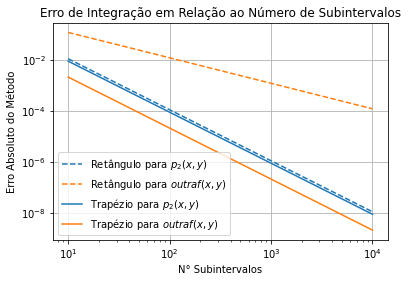

In [20]:
# Dica: use as mesmas cores 'C0' e 'C1' para cada função, trocando o estilo segundo o método
#       (as cores "default" da matplotlib são designadas por 'C0' a 'C9')

plt.loglog(ns3,np.abs(y3),label="Retângulo para $p_{2}(x,y)$",linestyle="--")
plt.loglog(ns3,np.abs(y4),label="Retângulo para $outraf(x,y)$",linestyle="--")
plt.loglog(ns3,np.abs(y5),label="Trapézio para $p_{2}(x,y)$",color="tab:blue")
plt.loglog(ns3,np.abs(y6),label="Trapézio para $outraf(x,y)$",color="tab:orange")
plt.title("Erro de Integração em Relação ao Número de Subintervalos")
plt.xlabel("N° Subintervalos")
plt.ylabel("Erro Absoluto do Método")
plt.legend()
plt.grid();
ax = plt.gca()

In [21]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 4
assert ax.get_xlabel() != ""

O que você observa no gráfico acima?

O comportamento das curvas que vem do Método do Trapézio são bem parecidas e concordam com a ideia de que o método tem convergencia da ordem de $O(h^2)$, porem da pra ver que para a função $p_{2}(x,y)$ o método dos retângulos já tem convergencia da ordem $O(h^2)$ o que muito provavelmente se da pela peculiaridade da sua derivada zerar o erro de ordem superior dando uma convergência melhor do que o método realmente garante. Fato este que não acontece com a função $outraf(x,y)$ o que acarreta nela seguir somente a convergência $O(h)$ do método dos retângulos.

## Questão 6: Bônus `np.meshgrid()`

A função `np.meshgrid` cria matrizes de coordenadas, a partir dos vetores de coordenadas separados.
Uma das utilidades é usar da seguinte forma:

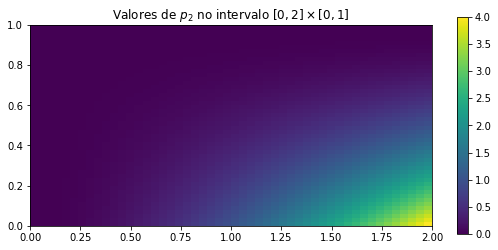

In [22]:
xs = np.linspace(0,2)
ys = np.linspace(0,1)
Xs, Ys = np.meshgrid(xs, ys)
Zs = p2(Xs, Ys)

plt.figure(figsize=(9,4))
plt.imshow(Zs, origin='lower', extent=[0,2,0,1])
plt.colorbar()
plt.title("Valores de $p_2$ no intervalo $[0,2] \\times [0,1]$");

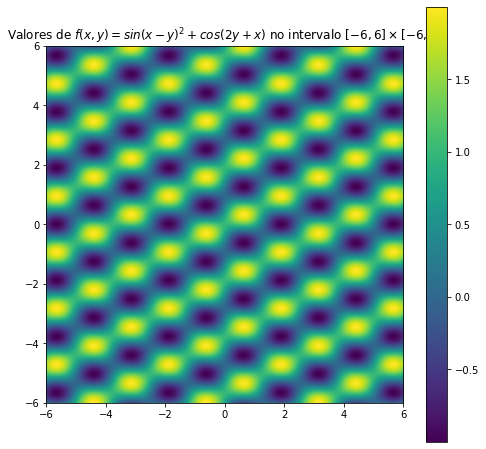

In [23]:
#Celula Teste
xs = np.linspace(-10,10,num=1000)
ys = np.linspace(-10,10,num=1000)
Xs, Ys = np.meshgrid(xs, ys)
Zs = outraf(Xs, Ys)

plt.figure(figsize=(8,8))
plt.imshow(Zs, extent=[-6,6,-6,6])
plt.colorbar()
plt.title("Valores de $f(x,y)=sin(x-y)^{2} + cos(2y+x)$ no intervalo $[-6,6] \\times [-6,6]$");

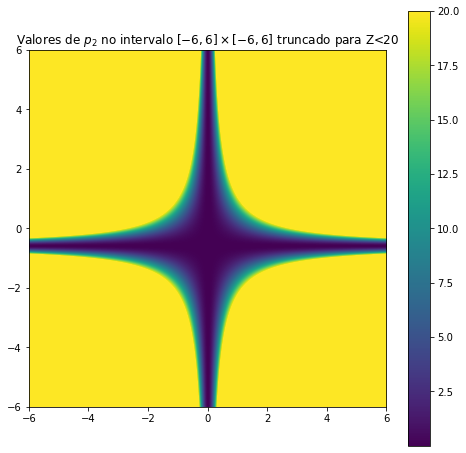

In [24]:
#Celula Teste
xs = np.linspace(-10,10,num=1000)
ys = np.linspace(-10,10,num=1000)
Xs, Ys = np.meshgrid(xs, ys)
Zs = p2(Xs, Ys)

plt.figure(figsize=(8,8))
plt.imshow(Zs, extent=[-6,6,-6,6],vmax=20)
plt.colorbar()
plt.title("Valores de $p_2$ no intervalo $[-6,6] \\times [-6,6]$ truncado para Z<20");

Use esta ideia para implementar o método do retângulo "de uma vez só", como se fosse uma integral dupla
(em vez de "iterada" como fizemos antes).

In [25]:
def i2_rec(f, a, b, c, d, nx=200, ny=200):
    """Integral de f no domínio  [a,b] x [c,d],  usando  nx x ny  subretângulos de integração."""
    axis=np.linspace(a,b,num=nx,endpoint=False)
    ayis=np.linspace(c,d,num=ny,endpoint=False)
    xs,ys=np.meshgrid(axis,ayis)
    C = ((b-a)/nx)*((d-c)/ny)
    return (np.sum(f(xs,ys)))*C

Verifique que ele dá o mesmo resultado (a menos de erros de arredondamento) que o método iterativo

In [26]:
zs1=i2_rec(p2,0,2,0,1)
zs2=int2_rect(p2,0,2,0,1)
diff=zs1-zs2
print(f"Método iterativo={zs1} , Método Da Integral Dupla ={zs2}")
print(f"Diferença entre os Métodos={diff}")

Método iterativo=0.8888611112500001 , Método Da Integral Dupla =0.8888611112500001
Diferença entre os Métodos=0.0
